## Sprint 02 - Lab 05 - Caso 2 Análisis de sentimientos en reseñas de películas
**Solución a problemas de Procesamiento de Lenguaje Natural (PLN)**

## 0. Importamos las librerías necesarias

In [22]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

## 1. Análisis y procesamiento de los datos

In [17]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [18]:
# Mostramos el número de filas y columnas
print(f"El dataset tiene {df.shape[0]} filas")

El dataset tiene 50000 filas


In [19]:
# Limpieza de los datos de la columna review con regex
def preprocess_text(text):
    # Convertir texto a minúsculas
    text = text.lower()
    # Eliminar etiquetas HTML
    text = re.sub(r'<.*?>', '', text)
    # Eliminar caracteres especiales y números
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Unir tokens nuevamente en una cadena de texto
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Aplicar preprocesamiento a la columna 'review'
df['review'] = df['review'].apply(preprocess_text)
df.head()

,review,sentiment
0,one reviewer mentioned watching oz episode hoo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [21]:
# Mostramos el número de filas con datos válidos
print(f"El dataset tiene {df.isnull().any(axis=1).sum()} filas con valores nulos")

# Eliminamos filas vacías
df_clean = df.dropna()

El dataset tiene 0 filas con valores nulos


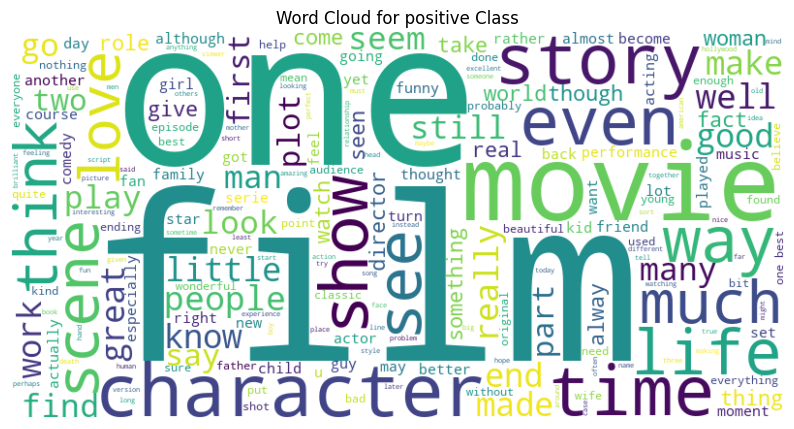

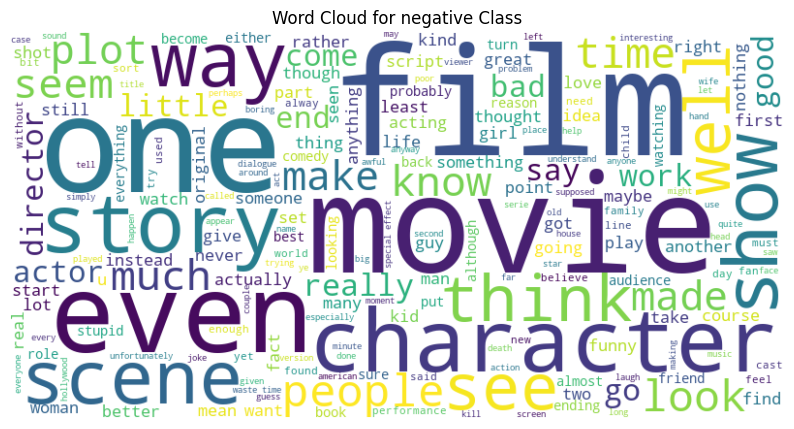

In [28]:
for label in ['positive', 'negative']:
    # Filter the data for the current class
    data = df_clean[df_clean['sentiment'] == label]['review']
    
    # Check if there are reviews available for the current class
    if len(data) > 0:
        # Concatenate all the text data into a single string
        text = ' '.join(data)
        
        # Create a word cloud object
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {label} Class')
        plt.axis('off')
        plt.show()
    else:
        print(f"No reviews available for the {label} class.")

In [33]:
# Dividir los datos en características (X) y etiquetas (y)
X = df['review']
y = df['sentiment']

# Representación de características: Bolsa de palabras (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

print(f"La reseña '{df_clean.review[5000]}' se codifica como:\n{X[5000]}")

La reseña 'movie everyone movie top lover black comedy cast including richard dreyfus vic jeff goldblum mick larry bishop nick gabriel byrne ben brass ball london lead line help dry supporting cast nearly dead center counting minor flaw movie ellen barkin make gave face washed look couple gim cameo joey bishop richard pryor served purpose michael j pollard screen time short cast incredible without ego wreck fine script seen larry bishop writer director film underworld dark crime flick enjoy one next outing writer director actor hell ride michael madsen quentin tarantino' se codifica como:
  (0, 57333)	1
  (0, 27520)	1
  (0, 81594)	1
  (0, 715)	1
  (0, 51626)	2
  (0, 15587)	1
  (0, 53657)	3
  (0, 48896)	1
  (0, 28812)	1
  (0, 21642)	2
  (0, 55440)	1
  (0, 47556)	1
  (0, 12440)	3
  (0, 71382)	1
  (0, 8258)	1
  (0, 46916)	1
  (0, 36287)	1
  (0, 82188)	1
  (0, 70977)	1
  (0, 25632)	1
  (0, 19123)	1
  (0, 28961)	1
  (0, 71024)	1
  (0, 17433)	1
  (0, 47479)	1
  :	:
  (0, 45601)	2
  (0, 39598

In [34]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de clasificación, por ejemplo, Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.884
Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88      4961
    positive       0.88      0.89      0.89      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



c:\Users\hugoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Función para clasificar una reseña como buena o mala
def classify_review(review):
    # Preprocesar la reseña
    preprocessed_review = preprocess_text(review)
    # Vectorizar la reseña
    review_vectorized = vectorizer.transform([preprocessed_review])
    # Clasificar la reseña usando el modelo
    prediction = model.predict(review_vectorized)
    # Devolver la etiqueta predicha
    return "Buena" if prediction[0] == 'positive' else "Mala"

# Ejemplo de reseña a clasificar
review_to_classify = "This movie was absolutely incredible! The acting was interesting."

# Clasificar la reseña
classification = classify_review(review_to_classify)
print(f"La reseña es clasificada como: {classification}")

La reseña es clasificada como: Buena
